# <span style='font-family:Georgia'> **Telco Customer Churn**

### [Dataset Link ](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=commentCount)

## Data Dictionary

**CustomerID** : A unique ID that identifies each customer.

**Gender**: The customer’s gender: Male, Female

**Age**: The customer’s current age, in years, at the time the fiscal quarter ended.

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Married (Partner)**: Indicates if the customer is married: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Number of Dependents**: Indicates the number of dependents that live with the customer.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Tenure**: Indicates the total amount of months that the customer has been with the company.

**Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.



# 1. Reading and Exploring the Data

In [36]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from IPython.display import Markdown
import plotly.express as px


%matplotlib inline 


In [37]:
def printmd(string):
    display(Markdown(string))


In [38]:
customer = pd.read_csv('TelcoCustomer.csv', index_col=0)


printmd(f"Dataset Dimensions : **{customer.shape[0]}** Rows,  **{customer.shape[1]}** Columns")

Dataset Dimensions : **7043** Rows,  **20** Columns

In [39]:
customer.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [40]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [41]:
customer.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [42]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## 2. Cleaning and Tuning the Data

Columns with missing values: 0


<AxesSubplot:>

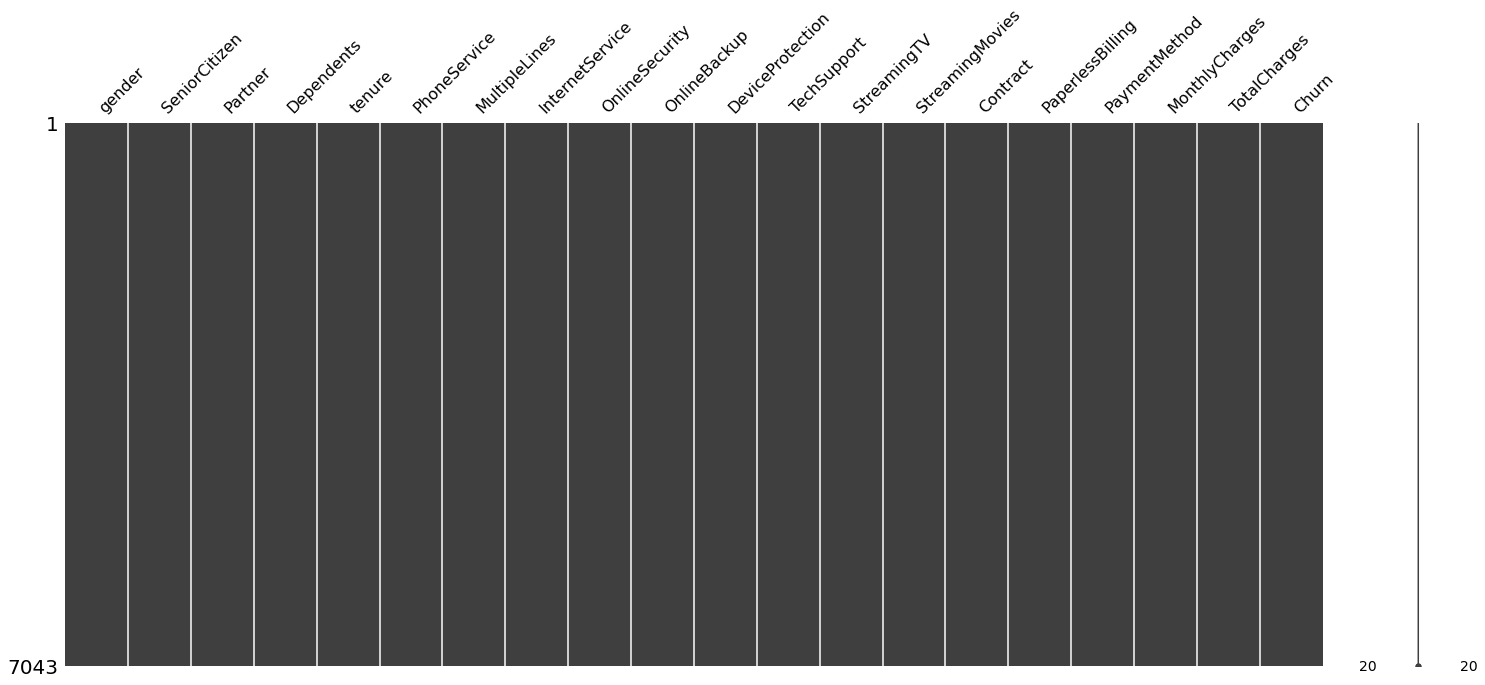

In [43]:
# check for the null values


columns_NA = customer.isna().sum()[customer.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))



msno.matrix(customer)



# there all no null values in the dataset .

### <span style='color:Blue'> Using the matrix we can quickly find out if there is any missing values . 

### <span style='color:Blue'> From the visualiziation it is clear that the data set does not have any missing values. </span>

In [44]:
# Remove the customer id from the dataset 

customer = customer.reset_index(drop=True)

customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [45]:


# replace all  no internet service / no phone service to NO

customer.replace('No internet service','No',inplace=True)
customer.replace('No phone service','No',inplace=True)



customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [46]:
# Renaming some values

customer.replace('Bank transfer (automatic)','Bank Transfer',inplace=True)
customer.replace('Credit card (automatic)','Credit Card',inplace=True)
customer.replace('Month-to-month','Monthly',inplace=True)







In [47]:
# check if there are any zero values in tensure feature


customer[customer['tenure'] == 0].index

# we have 11 missing values , lets delete them 


customer.drop(labels=customer[customer['tenure'] == 0].index, axis=0, inplace=True)


customer[customer['tenure'] == 0].index




Int64Index([], dtype='int64')

In [148]:
# convert total charges column to float type 

customer['TotalCharges'] = customer['TotalCharges'].astype(float)

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_4689/3586470058.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
# get te unique number of every column



Categorical_Feature = customer.columns[customer.dtypes==object].tolist()


Numeric_Feature = customer.columns[customer.dtypes!=object].tolist()


        
printmd("**-------------------- Categorical Fields --------------------**\n")
for i in range(len(Categorical_Feature)):
    if customer[Categorical_Feature[i]].dtypes==object:
        printmd("Unique number of {} -> {}".format(Categorical_Feature[i],
                                                 len(customer[Categorical_Feature[i]].unique())))
        
printmd("\n**-------------------- Numeric Fields --------------------**\n")
for i in range(len(Numeric_Feature)):
    if customer[Numeric_Feature[i]].dtypes!=object:
        printmd("Unique number of {} -> {}".format(Numeric_Feature[i], 
                                                 len(customer[Numeric_Feature[i]].unique())))
        
        

**-------------------- Categorical Fields --------------------**


Unique number of gender -> 2

Unique number of Partner -> 2

Unique number of Dependents -> 2

Unique number of PhoneService -> 2

Unique number of MultipleLines -> 2

Unique number of InternetService -> 3

Unique number of OnlineSecurity -> 2

Unique number of OnlineBackup -> 2

Unique number of DeviceProtection -> 2

Unique number of TechSupport -> 2

Unique number of StreamingTV -> 2

Unique number of StreamingMovies -> 2

Unique number of Contract -> 3

Unique number of PaperlessBilling -> 2

Unique number of PaymentMethod -> 4

Unique number of TotalCharges -> 6530

Unique number of Churn -> 2


**-------------------- Numeric Fields --------------------**


Unique number of SeniorCitizen -> 2

Unique number of tenure -> 72

Unique number of MonthlyCharges -> 1584

In [50]:
for i in range(len(Categorical_Feature)):
    printmd("\n**{}**".format(Categorical_Feature[i]))
    print(customer[Categorical_Feature[i]].unique())


**gender**

['Female' 'Male']



**Partner**

['Yes' 'No']



**Dependents**

['No' 'Yes']



**PhoneService**

['No' 'Yes']



**MultipleLines**

['No' 'Yes']



**InternetService**

['DSL' 'Fiber optic' 'No']



**OnlineSecurity**

['No' 'Yes']



**OnlineBackup**

['Yes' 'No']



**DeviceProtection**

['No' 'Yes']



**TechSupport**

['No' 'Yes']



**StreamingTV**

['No' 'Yes']



**StreamingMovies**

['No' 'Yes']



**Contract**

['Monthly' 'One year' 'Two year']



**PaperlessBilling**

['Yes' 'No']



**PaymentMethod**

['Electronic check' 'Mailed check' 'Bank Transfer' 'Credit Card']



**TotalCharges**

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']



**Churn**

['No' 'Yes']


In [51]:
# dropping duplicates

customer = customer.drop_duplicates()
printmd(f"Dataset Dimensions : **{customer.shape[0]}** Rows,  **{customer.shape[1]}** Columns")

Dataset Dimensions : **7010** Rows,  **20** Columns

In [52]:
customer[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7010.0,32.520399,24.520441,1.00,9.00,29.0,56.0,72.00
MonthlyCharges,7010.0,64.888666,30.064769,18.25,35.75,70.4,89.9,118.75


## 3. Data visualization

In [53]:
customer.groupby('Churn').count()

customer['Churn'].value_counts().index

Index(['No', 'Yes'], dtype='object')

[Text(0.5, 1.0, 'Customers Churn Rate'),
 Text(0.5, 0, 'Customer Churn ?'),
 Text(0, 0.5, 'Count')]

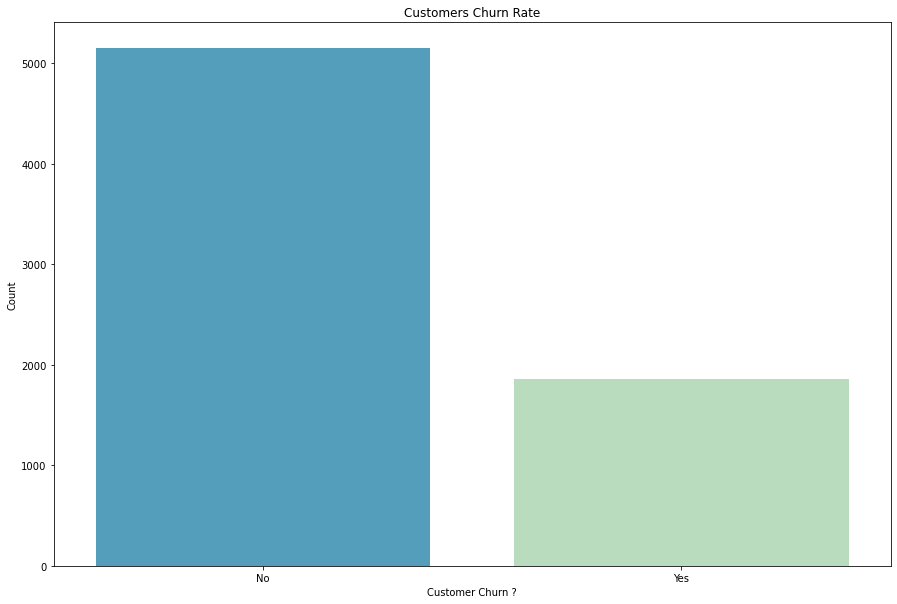

In [54]:
plt.figure(figsize=(15, 10))
#housing_sort=customer.sort_values('SalePrice',ascending=True)
sns.barplot(data=customer,
            y=customer['Churn'].value_counts().values,
            x=customer['Churn'].value_counts().index,
            palette='GnBu_r'
            #,hue='RoofMatl'
           ).set(title='Customers Churn Rate'
                 ,xlabel='Customer Churn ?'
                 ,ylabel='Count')



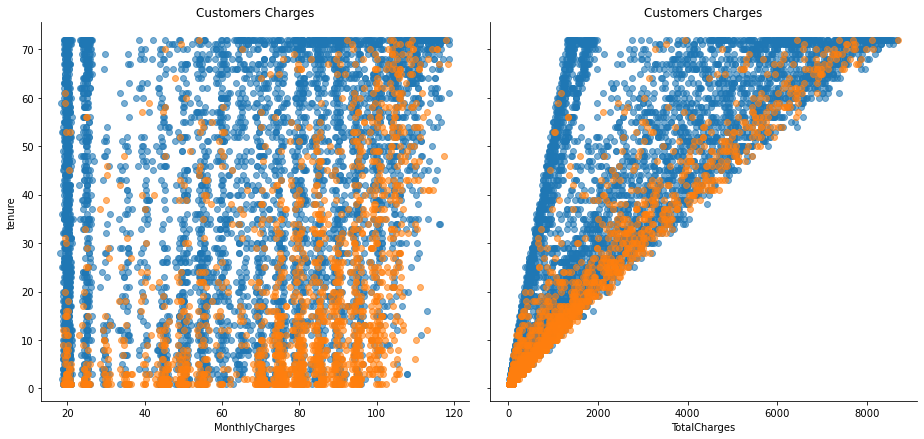

In [159]:



s = sns.PairGrid(customer, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=6, hue="Churn", aspect=1.1)
s.set(title='Customers Charges')
ax = s.map(plt.scatter, alpha=0.6)


In [100]:
fig = px.histogram(customer, x="Churn", color="Contract", barmode="group"
                   , title="<b>Customer Contracts Distribution<b>",
                   color_discrete_map={"Monthly": "#1C8356", "One year": "#00CC96" ,"Two year": "#B6E880"})
fig.update_layout(width=800, height=600, bargap=0.1,
                 xaxis_title="Churn",yaxis_title="Count",legend_title="Contract Type")
fig.show()

### <span style='color:navy'> Most of Cutomers that leaves are with Monthly contracts ( 75% ).
### <span style='color:navy'> Customers with Longer period contracts are less likely to leave.
    
   

Text(25.17847222222222, 0.5, 'Monthly Charge')

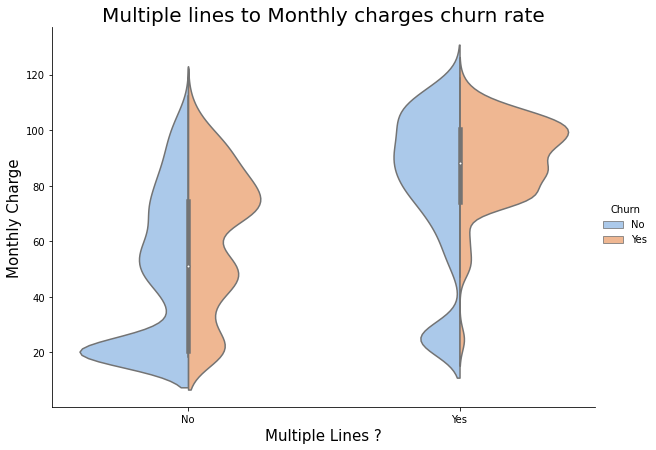

In [167]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=customer, height=6, aspect=1.4)
plt.title("Multiple lines to Monthly charges churn rate" , fontsize=20)
plt.xlabel("Multiple Lines ?", fontsize=15)
plt.ylabel("Monthly Charge", fontsize=15)

### <span style='color:navy'> Customers with multiple lines and higher monthly cost are more likely to churn.

In [82]:
fig = px.histogram(customer, x="Churn", color="PaymentMethod", title="<b>Customer Payment Methods")
fig.update_layout(width=800, height=600, bargap=0.1,
                 xaxis_title="Churn",yaxis_title="Count",legend_title="Payment Method")
fig.show()

### <span style='color:navy'> Mojority of Customers who left were having Electronic Check as Payment Method.
### <span style='color:navy'> Customers with Credit-Cards or Bank Transfer or Mailed Check as Payment Method were less likely to leave. <span>
          

In [81]:
fig = px.histogram(customer, x="Churn", color="Dependents", barmode="group",
                   title="Dependents Distribution" , color_discrete_map={"Yes": "#E15F99", "No": "#620042"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have Dependants?")
fig.show()

### <span style='color:navy'> Customers **without** Dependants are more likely to churn. <span>


In [96]:
fig = px.histogram(customer, x="Churn", color="Partner", barmode="group",
                   title="Partners Distribution" , color_discrete_map={"Yes": "#DC3912", "No": "#FF9900"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="With Partner?")
fig.show()

### <span style='color:navy'> Customers without Partners are more likely to churn <span>

In [121]:
fig = px.histogram(customer, x="Churn", color="SeniorCitizen",
                   title="<b>Senior Citizens Distribution" , color_discrete_map={"Yes": "#1BECF", "No": "#FF99"}
                  , labels={0: "No", 1: "Yes"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Is Senior?")

labels = {'0': "No", '1': "Yes"}
fig.for_each_trace(lambda t: t.update(name = labels[t.name],
                                      legendgroup = labels[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, labels[t.name])
                                     )
                  )

fig.show()

### <span style='color:navy'> Senior Customers are more likely to churn <span>

In [128]:
fig = px.histogram(customer, x="Churn", color="OnlineSecurity",
                   title="<b>Churn relation with Online Security" , color_discrete_map={"Yes": "#FECB52", "No": "#C4451C"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have Security?")


fig.show()

### <span style='color:navy'> Most Cutomers leaving does not have online security.

In [133]:
fig = px.histogram(customer, x="Churn", color="PaperlessBilling",
                   title="<b>Churn relation with Paper / Paperless billing" ,
                   color_discrete_map={"Yes": "#222A2A", "No": "#BAB0AC"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Is Papaerless?")


fig.show()

### <span style='color:navy'> Customers with Paperless Billing are most likely to churn.

In [137]:
fig = px.histogram(customer, x="Churn", color="TechSupport",
                   title="<b>Churn relation to Tech Support" ,
                   color_discrete_map={"Yes": "#E15F99", "No": "#FF9DA6"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have Tech Support?")


fig.show()

### <span style='color:navy'> Most Leaving Cutomers have to Tech Support.

In [138]:
fig = px.histogram(customer, x="Churn", color="PhoneService",
                   title="<b>Churn relation to PhoneService" ,
                   color_discrete_map={"Yes": '#00CC96', "No": '#B6E880'})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have PhoneService?")


fig.show()

### <span style='color:navy'> Most Leaving Cutomers have Phone Service .

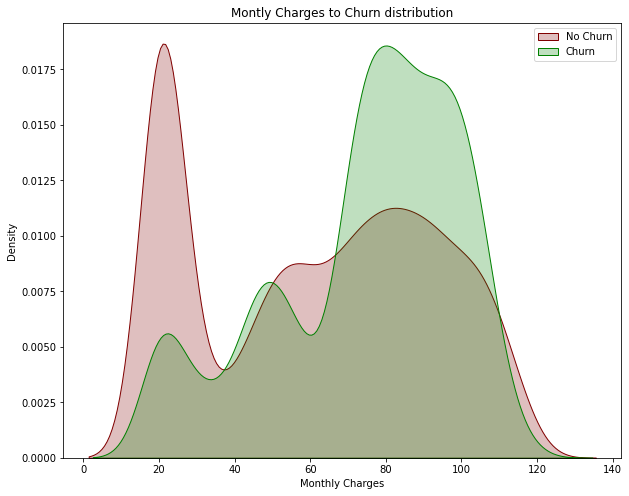

In [146]:


plt.figure(figsize=(10, 8))
ax = sns.kdeplot(customer.MonthlyCharges[(customer["Churn"] == 'No') ],
                color="maroon", shade = True);
ax = sns.kdeplot(customer.MonthlyCharges[(customer["Churn"] == 'Yes') ],
                ax =ax, color="green", shade= True);
ax.legend(["No Churn","Churn"]);
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Montly Charges to Churn distribution');

### <span style='color:navy'> Customers with higher Monthly Charges are also more likely to churn

In [153]:
fig = px.box(customer, x='Churn', y = 'tenure',title="<b>Churn vs Tenure" ,)

fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Months",legend_title="Churn Vvs Tenure")

fig.show()

### <span style='color:navy'> New Customers are more likely to churn.


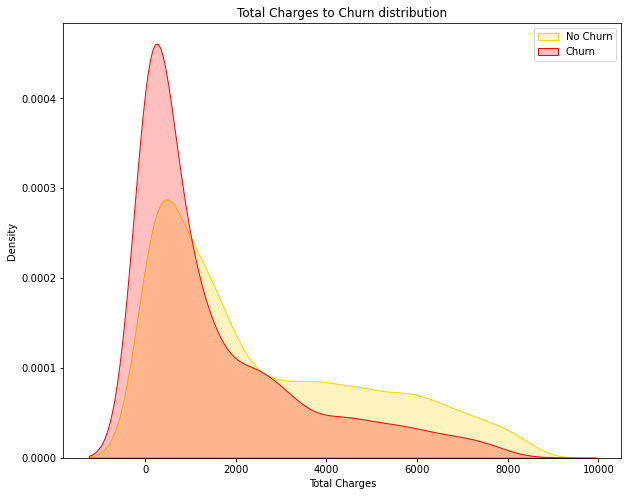

In [150]:

plt.figure(figsize=(10, 8))
ax = sns.kdeplot(customer.TotalCharges[(customer["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(customer.TotalCharges[(customer["Churn"] == 'Yes') ],
                ax =ax, color="red", shade= True);
ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges to Churn distribution');

## Modeling

In [20]:
# convert All Categorical Values to numerical


customer['Partner'] = customer['Partner'].apply(lambda x: 0 if x=='No' else 1)
customer['Dependents'] = customer['Dependents'].apply(lambda x: 0 if x=='No' else 1)
customer['PhoneService'] = customer['PhoneService'].apply(lambda x: 0 if x=='No' else 1)
customer['OnlineSecurity'] = customer['OnlineSecurity'].apply(lambda x: 0 if x=='No' else 1)
customer['OnlineBackup'] = customer['OnlineBackup'].apply(lambda x: 0 if x=='No' else 1)
customer['DeviceProtection'] = customer['DeviceProtection'].apply(lambda x: 0 if x=='No' else 1)
customer['StreamingTV'] = customer['StreamingTV'].apply(lambda x: 0 if x=='No' else 1)
customer['StreamingMovies'] = customer['StreamingMovies'].apply(lambda x: 0 if x=='No' else 1)
customer['PaperlessBilling'] = customer['PaperlessBilling'].apply(lambda x: 0 if x=='No' else 1)
customer['Churn'] = customer['Churn'].apply(lambda x: 0 if x=='No' else 1)


customer

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_4689/3702275532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Partner'] = customer['Partner'].apply(lambda x: 0 if x=='No' else 1)
/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_4689/3702275532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Dependents'] = customer['Dependents'].apply(lambda x: 0 if x=='No' else 1)
/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_4689/3702275532.py:6: SettingWithCo

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No,DSL,0,1,0,No,0,0,Monthly,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,No,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,No,0,0,Monthly,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No,DSL,1,0,1,Yes,0,0,One year,0,Bank Transfer,42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,No,0,0,Monthly,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,1,0,1,Yes,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,0,1,1,No,1,1,One year,1,Credit Card,103.20,7362.9,0
7040,Female,0,1,1,11,0,No,DSL,1,0,0,No,0,0,Monthly,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,0,0,0,No,0,0,Monthly,1,Mailed check,74.40,306.6,1


/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_4689/3586470058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['TotalCharges'] = customer['TotalCharges'].astype(float)
